<a href="https://colab.research.google.com/github/nmfel/DataScienceProject/blob/main/Global%20Life%20Expectancy%201960-2022/Global_Life_Expectancy_1960_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Global Life Expectancy And Prediction Using Supervised Learning


---


## Pendahuluan
Life expectancy, atau harapan hidup, adalah indikator statistik yang penting dalam epidemiologi dan ekonomi kesehatan, yang menggambarkan rata-rata jumlah tahun yang diharapkan seseorang dapat hidup mulai dari usia tertentu. Indikator ini sering digunakan untuk mengevaluasi kesehatan masyarakat dan kualitas hidup di berbagai belahan dunia.

Dalam proyek ini, saya menggunakan dataset global mengenai life expectancy yang diperoleh dari platform Kaggle, mencakup periode dari tahun 1960 hingga 2022. Dataset ini tidak hanya mencakup data global tetapi juga mencakup semua negara dan wilayah, dengan informasi terperinci yang dibagi berdasarkan kelompok pendapatan. Kategorisasi ini memungkinkan analisis mendalam mengenai bagaimana life expectancy bervariasi antara negara dengan pendapatan berbeda.

Dengan menggunakan data ini, saya bertujuan untuk melakukan forecasting life expectancy dari tahun 2023 hingga 2030 menggunakan model regresi linier. Pendekatan ini bertujuan untuk mengidentifikasi pola tren dalam life expectancy global dan regional serta memperkirakan masa depan harapan hidup berdasarkan tren historis. Hasil dari analisis ini diharapkan dapat memberikan wawasan yang berharga mengenai proyeksi masa depan harapan hidup manusia dan membantu dalam perencanaan serta pengembangan kebijakan kesehatan global.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Global_Life_Expectancy_1960-2022.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 70 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Country Code    217 non-null    object 
 2   Indicator Name  217 non-null    object 
 3   Indicator Code  217 non-null    object 
 4   Region          217 non-null    object 
 5   IncomeGroup     216 non-null    object 
 6   1960            204 non-null    float64
 7   1961            205 non-null    float64
 8   1962            205 non-null    float64
 9   1963            204 non-null    float64
 10  1964            204 non-null    float64
 11  1965            204 non-null    float64
 12  1966            205 non-null    float64
 13  1967            205 non-null    float64
 14  1968            205 non-null    float64
 15  1969            205 non-null    float64
 16  1970            205 non-null    float64
 17  1971            205 non-null    flo

In [6]:
df.isnull().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
Region,0
...,...
2019,8
2020,8
2021,7
2022,8


In [7]:
df

,Country Name,Country Code,Indicator Name,Indicator Code,Region,IncomeGroup,1960,1961,1962,1963,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,SpecialNotes
0,Aruba,ABW,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Latin America & Caribbean,High income,64.152,64.537,64.752,65.132,...,75.601,75.683,75.617,75.903,76.072,76.248,75.723,74.626,74.992,NaN
1,Afghanistan,AFG,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,South Asia,Low income,32.535,33.068,33.547,34.016,...,62.545,62.659,63.136,63.016,63.081,63.565,62.575,61.982,62.879,The reporting period for national accounts dat...
2,Angola,AGO,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Sub-Saharan Africa,Lower middle income,38.211,37.267,37.539,37.824,...,60.040,60.655,61.092,61.680,62.144,62.448,62.261,61.643,61.929,The World Bank systematically assesses the app...
3,Albania,ALB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Europe & Central Asia,Upper middle income,54.439,55.634,56.671,57.844,...,78.407,78.644,78.860,79.047,79.184,79.282,76.989,76.463,76.833,NaN
4,Andorra,AND,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Europe & Central Asia,High income,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Europe & Central Asia,Upper middle income,61.485,61.836,62.134,62.440,...,78.880,78.922,78.981,78.783,78.696,79.022,76.567,76.806,79.524,NaN
213,"Yemen, Rep.",YEM,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Middle East & North Africa,Low income,33.678,34.098,33.615,33.247,...,67.384,65.873,66.064,65.957,64.575,65.092,64.650,63.753,63.720,The World Bank systematically assesses the app...
214,South Africa,ZAF,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Sub-Saharan Africa,Upper middle income,52.669,53.085,53.376,53.633,...,63.380,63.950,64.747,65.402,65.674,66.175,65.252,62.341,61.480,Fiscal year end: March 31; reporting period fo...
215,Zambia,ZMB,"Life expectancy at birth, total (years)",SP.DYN.LE00.IN,Sub-Saharan Africa,Lower middle income,49.042,49.452,49.794,50.133,...,60.699,61.208,61.794,62.120,62.342,62.793,62.380,61.223,61.803,National accounts data were rebased to reflect...


In [8]:
df.drop(columns=['Indicator Name', 'Indicator Code', 'SpecialNotes'], inplace=True)

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
Country Name,0
Country Code,0
Region,0
IncomeGroup,0
1960,0
...,...
2018,0
2019,0
2020,0
2021,0


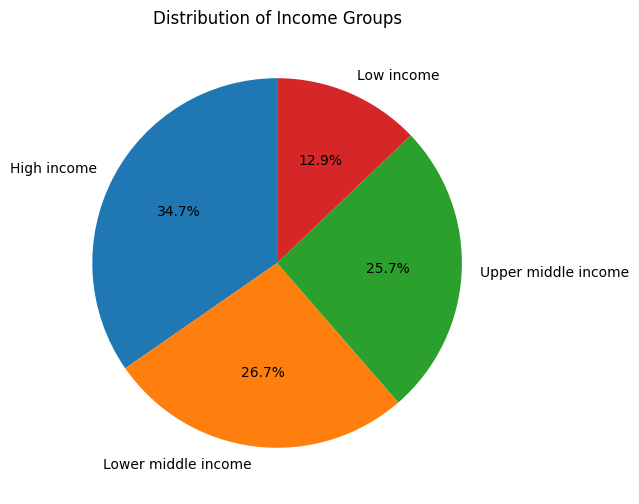

In [11]:
#pie chart untuk IncomeGroup secara keseluruhan

income_group_counts = df['IncomeGroup'].value_counts()

plt.figure(figsize=(8, 6))
plt.pie(income_group_counts, labels=income_group_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Income Groups')
plt.show()


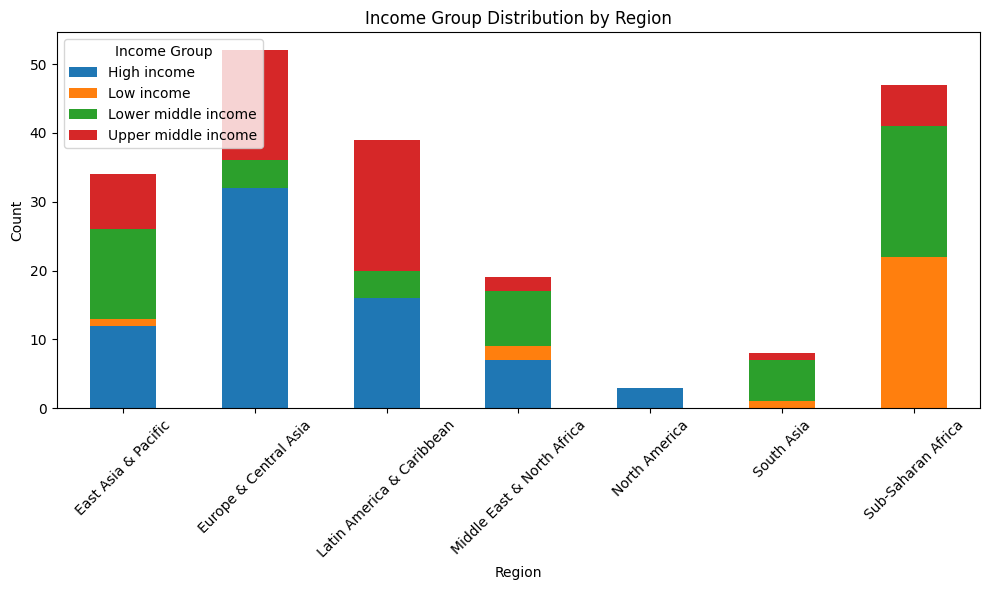

In [12]:
#menunjukan tingkat income groups di tiap regions

# Kelompokkan DataFrame berdasarkan 'Wilayah' dan 'Grup Pendapatan', lalu menghitung kemunculannya
region_income_counts = df.groupby(['Region', 'IncomeGroup'])['IncomeGroup'].count().unstack().fillna(0)

# Plot a stacked bar chart
region_income_counts.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Income Group Distribution by Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Income Group')
plt.tight_layout()
plt.show()


In [13]:
# income group yang dominan di tiap region

# Kelompokkan DataFrame berdasarkan 'Region' dan mencari 'Income Group' yang paling sering digunakan untuk setiap wilayah
dominant_income_groups = df.groupby('Region')['IncomeGroup'].agg(pd.Series.mode)

print(dominant_income_groups)


Region
East Asia & Pacific           Lower middle income
Europe & Central Asia                 High income
Latin America & Caribbean     Upper middle income
Middle East & North Africa    Lower middle income
North America                         High income
South Asia                    Lower middle income
Sub-Saharan Africa                     Low income
Name: IncomeGroup, dtype: object


In [14]:
# Menghitung rata-rata dari kolom 1960 hingga 2022
average_life_expectancy = df.loc[:, '1960':'2022'].mean()

print(average_life_expectancy)


1960    54.260172
1961    54.701977
1962    55.193889
1963    55.561646
1964    56.187989
          ...    
2018    72.566829
2019    72.767644
2020    72.128051
2021    71.521687
2022    72.251458
Length: 63, dtype: float64


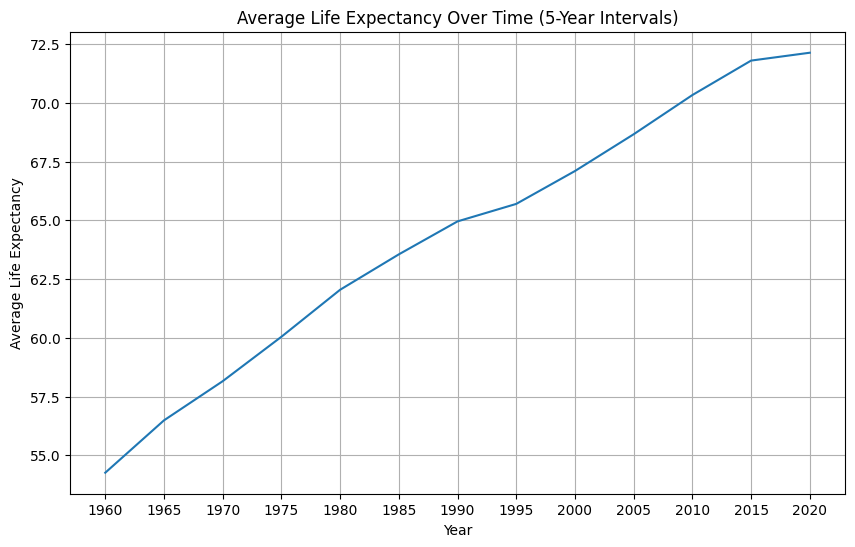

In [15]:
# Pilih tahun dengan interval 5 tahun
years_to_plot = average_life_expectancy.index[::5]

# Buat line chart
plt.figure(figsize=(10, 6))
plt.plot(years_to_plot, average_life_expectancy[years_to_plot])
plt.title('Average Life Expectancy Over Time (5-Year Intervals)')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.show()


In [16]:
# Filter DataFrame untuk setiap kategori pendapatan
high_income_df = df[df['IncomeGroup'] == 'High income']
low_income_df = df[df['IncomeGroup'] == 'Low income']
upper_middle_income_df = df[df['IncomeGroup'] == 'Upper middle income']
lower_middle_income_df = df[df['IncomeGroup'] == 'Lower middle income']

# Hitung rata-rata harapan hidup untuk setiap kategori
average_life_expectancy_high = high_income_df.loc[:, '1960':'2022'].mean()
average_life_expectancy_low = low_income_df.loc[:, '1960':'2022'].mean()
average_life_expectancy_upper_middle = upper_middle_income_df.loc[:, '1960':'2022'].mean()
average_life_expectancy_lower_middle = lower_middle_income_df.loc[:, '1960':'2022'].mean()

# Cetak hasilnya
print("Rata-rata harapan hidup untuk negara berpenghasilan tinggi:", average_life_expectancy_high.mean())
print("Rata-rata harapan hidup untuk negara berpenghasilan rendah:", average_life_expectancy_low.mean())
print("Rata-rata harapan hidup untuk negara berpenghasilan menengah ke atas:", average_life_expectancy_upper_middle.mean())
print("Rata-rata harapan hidup untuk negara berpenghasilan menengah ke bawah:", average_life_expectancy_lower_middle.mean())


Rata-rata harapan hidup untuk negara berpenghasilan tinggi: 73.26522695094297
Rata-rata harapan hidup untuk negara berpenghasilan rendah: 50.25057448107449
Rata-rata harapan hidup untuk negara berpenghasilan menengah ke atas: 66.32777483695168
Rata-rata harapan hidup untuk negara berpenghasilan menengah ke bawah: 58.58459394043676


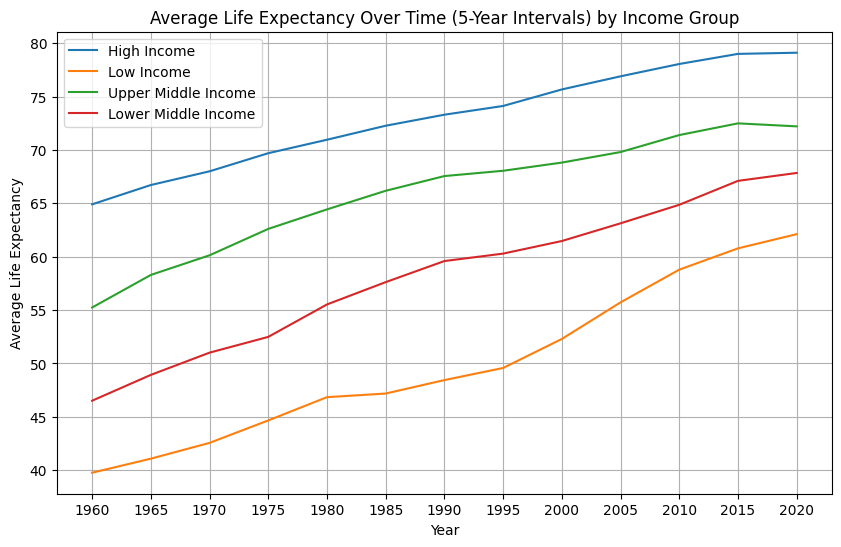

In [17]:
# Pilih tahun dengan interval 5 tahun
years_to_plot = average_life_expectancy_high.index[::5]

# Buat line chart
plt.figure(figsize=(10, 6))

plt.plot(years_to_plot, average_life_expectancy_high[years_to_plot], label='High Income')
plt.plot(years_to_plot, average_life_expectancy_low[years_to_plot], label='Low Income')
plt.plot(years_to_plot, average_life_expectancy_upper_middle[years_to_plot], label='Upper Middle Income')
plt.plot(years_to_plot, average_life_expectancy_lower_middle[years_to_plot], label='Lower Middle Income')

plt.title('Average Life Expectancy Over Time (5-Year Intervals) by Income Group')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.legend()
plt.show()


In [18]:
# Hitung rata-rata untuk setiap baris pada kolom '1960' hingga '2022'
df['Total Average'] = df.loc[:, '1960':'2022'].mean(axis=1)

# Tampilkan DataFrame yang diperbarui
df


,Country Name,Country Code,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Average
0,Aruba,ABW,Latin America & Caribbean,High income,64.152,64.537,64.752,65.132,65.294,65.502,...,75.601,75.683,75.617,75.903,76.072,76.248,75.723,74.626,74.992,71.862683
1,Afghanistan,AFG,South Asia,Low income,32.535,33.068,33.547,34.016,34.494,34.953,...,62.545,62.659,63.136,63.016,63.081,63.565,62.575,61.982,62.879,48.152556
2,Angola,AGO,Sub-Saharan Africa,Lower middle income,38.211,37.267,37.539,37.824,38.131,38.495,...,60.040,60.655,61.092,61.680,62.144,62.448,62.261,61.643,61.929,46.917762
3,Albania,ALB,Europe & Central Asia,Upper middle income,54.439,55.634,56.671,57.844,58.983,60.019,...,78.407,78.644,78.860,79.047,79.184,79.282,76.989,76.463,76.833,71.585540
5,United Arab Emirates,ARE,Middle East & North Africa,High income,48.811,49.695,50.686,51.584,52.848,53.985,...,79.044,79.223,79.335,79.504,79.627,79.726,78.946,78.710,79.196,69.851381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,Kosovo,XKX,Europe & Central Asia,Upper middle income,61.485,61.836,62.134,62.440,62.734,63.041,...,78.880,78.922,78.981,78.783,78.696,79.022,76.567,76.806,79.524,70.970429
213,"Yemen, Rep.",YEM,Middle East & North Africa,Low income,33.678,34.098,33.615,33.247,34.738,35.373,...,67.384,65.873,66.064,65.957,64.575,65.092,64.650,63.753,63.720,54.925952
214,South Africa,ZAF,Sub-Saharan Africa,Upper middle income,52.669,53.085,53.376,53.633,53.906,54.192,...,63.380,63.950,64.747,65.402,65.674,66.175,65.252,62.341,61.480,59.232905
215,Zambia,ZMB,Sub-Saharan Africa,Lower middle income,49.042,49.452,49.794,50.133,49.849,50.563,...,60.699,61.208,61.794,62.120,62.342,62.793,62.380,61.223,61.803,52.488000


In [19]:
# Temukan nilai tertinggi dari 'Total Average'
highest_average = df['Total Average'].max()

# Temukan nilai terendah dari 'Total Average'
lowest_average = df['Total Average'].min()

print("Nilai tertinggi dari Total Average:", highest_average)
print("Nilai terendah dari Total Average:", lowest_average)


Nilai tertinggi dari Total Average: 78.32172822299648
Nilai terendah dari Total Average: 39.362555555555545


In [20]:
df.sort_values(by='Total Average', ascending=False, inplace=True)
df.head(5)

,Country Name,Country Code,Region,IncomeGroup,1960,1961,1962,1963,1964,1965,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,Total Average
93,Iceland,ISL,Europe & Central Asia,High income,73.762049,73.503415,73.721951,73.042927,73.541707,73.868780,...,82.860976,82.468293,82.204878,82.660976,82.860976,83.163415,83.063415,83.165854,82.170732,78.321728
98,Japan,JPN,East Asia & Pacific,High income,67.695610,68.351951,68.634878,69.712439,70.206585,70.266829,...,83.587805,83.793902,83.984878,84.099756,84.210976,84.356341,84.560000,84.445610,83.996341,78.131947
182,Sweden,SWE,Europe & Central Asia,High income,73.005610,73.474390,73.350488,73.555366,73.733171,73.861707,...,82.253659,82.204878,82.307317,82.409756,82.558537,83.109756,82.356098,83.056098,83.109756,78.010480
33,Switzerland,CHE,Europe & Central Asia,High income,71.313415,71.644878,71.196098,71.187561,72.077805,72.201707,...,83.197561,82.897561,83.602439,83.551220,83.753659,83.904878,83.000000,83.751220,83.453659,77.852176
145,Norway,NOR,Europe & Central Asia,High income,73.549756,73.550488,73.448049,73.077561,73.595854,73.723171,...,82.100000,82.304878,82.407317,82.609756,82.758537,82.958537,83.209756,83.163415,82.560976,77.600976


In [21]:
df.reset_index(drop=True, inplace=True) #mereset data frane

In [22]:
# Hitung rata-rata 'Total Average' untuk setiap wilayah dan kelompok pendapatan
average_by_region_income = df.groupby(['Region', 'IncomeGroup'])['Total Average'].mean().unstack()

# Buat DataFrame baru dari hasil
df_new = pd.DataFrame(average_by_region_income)

# Tampilkan DataFrame baru
print(df_new)


IncomeGroup                 High income  Low income  Lower middle income  \
Region                                                                     
East Asia & Pacific           73.111337   65.891714            60.351408   
Europe & Central Asia         74.858570         NaN            65.138292   
Latin America & Caribbean     71.011920         NaN            59.057595   
Middle East & North Africa    70.362948   60.802230            63.133647   
North America                 75.674746         NaN                  NaN   
South Asia                          NaN   48.152556            59.331585   
Sub-Saharan Africa                  NaN   48.675737            53.745134   

IncomeGroup                 Upper middle income  
Region                                           
East Asia & Pacific                   64.893359  
Europe & Central Asia                 68.695898  
Latin America & Caribbean             67.885603  
Middle East & North Africa            64.266341  
North America  

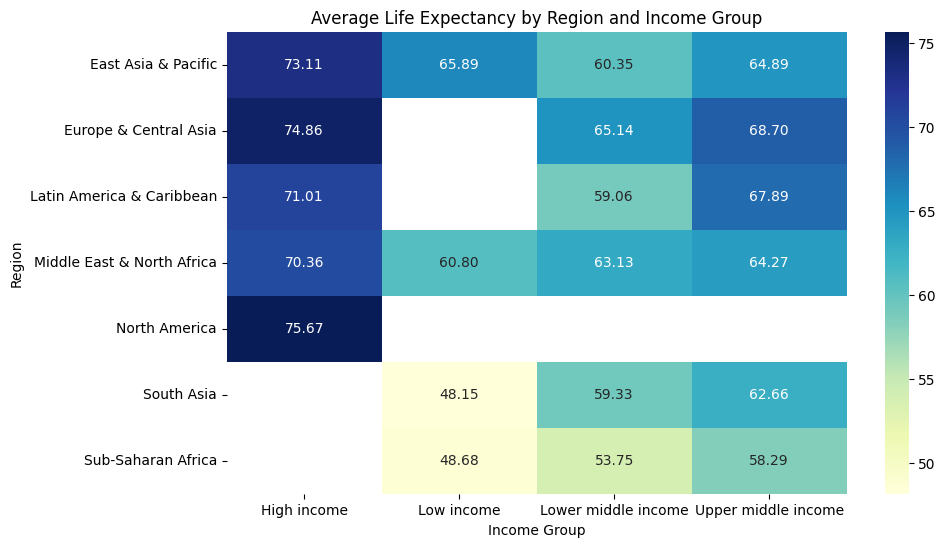

In [23]:
# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_new, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Average Life Expectancy by Region and Income Group')
plt.xlabel('Income Group')
plt.ylabel('Region')
plt.show()


In [24]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Region_Encoded'] = label_encoder.fit_transform(df['Region'])
df['IncomeGroup_Encoded'] = label_encoder.fit_transform(df['IncomeGroup'])

# Hitung matriks korelasi
correlation_matrix = df[['Region_Encoded', 'IncomeGroup_Encoded', 'Total Average']].corr()

# Tampilkan matriks korelasi
print(correlation_matrix)


                     Region_Encoded  IncomeGroup_Encoded  Total Average
Region_Encoded             1.000000             0.108435      -0.707939
IncomeGroup_Encoded        0.108435             1.000000      -0.329896
Total Average             -0.707939            -0.329896       1.000000


Intepretasi
1. Region_Encoded - IncomeGroup_Encoded: Korelasi yang rendah (0.108435) menunjukkan bahwa tidak ada hubungan linear yang kuat antara wilayah dan kelompok pendapatan.
2. Region_Encoded - Total Average: Korelasi negatif yang kuat (-0.707939) menunjukkan bahwa ada hubungan yang kuat antara wilayah dan rata-rata harapan hidup total. Wilayah dengan nilai yang lebih tinggi cenderung memiliki rata-rata harapan hidup total yang lebih rendah.
3. IncomeGroup_Encoded - Total Average: Korelasi negatif sedang (-0.329896) menunjukkan bahwa ada hubungan sedang antara kelompok pendapatan dan rata-rata harapan hidup total. Kelompok pendapatan dengan nilai yang lebih tinggi cenderung memiliki rata-rata harapan hidup total yang lebih rendah.

In [71]:
#Deskripsi Statistik
print(df.describe())  # Ringkasan statistik untuk variabel numerik

             1960        1961        1962        1963        1964        1965  \
count  202.000000  202.000000  202.000000  202.000000  202.000000  202.000000   
mean    54.260172   54.701977   55.193889   55.561646   56.187989   56.487695   
std     11.672205   11.535680   11.323150   11.309809   11.298355   11.298826   
min     28.662000   28.840000   29.119000   28.826000   30.418000   29.288000   
25%     44.808250   45.495500   46.609500   46.538750   47.512500   47.837250   
50%     55.057512   55.477476   56.557500   57.024000   58.239500   58.595500   
75%     64.353500   64.530750   64.966500   65.084000   65.834250   66.254750   
max     73.762049   73.652683   73.721951   73.555366   73.733171   73.868780   

             1966        1967        1968        1969  ...        2016  \
count  202.000000  202.000000  202.000000  202.000000  ...  202.000000   
mean    56.864209   57.303055   57.603160   57.829509  ...   72.109820   
std     11.240258   11.180035   11.024559   11.0

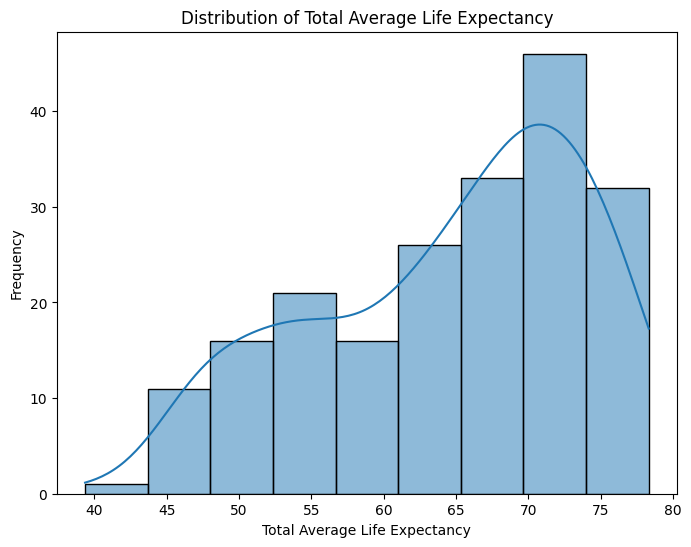

In [72]:
#Distribusi Variabel Target (Total Average)
plt.figure(figsize=(8, 6))
sns.histplot(df['Total Average'], kde=True)
plt.title('Distribution of Total Average Life Expectancy')
plt.xlabel('Total Average Life Expectancy')
plt.ylabel('Frequency')
plt.show()

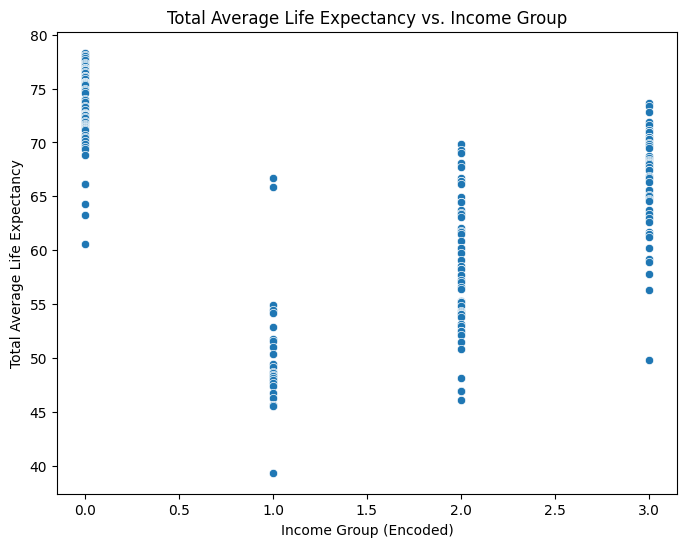

In [73]:
#Scatter plot untuk 'Total Average' vs. 'IncomeGroup_Encoded'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='IncomeGroup_Encoded', y='Total Average', data=df)
plt.title('Total Average Life Expectancy vs. Income Group')
plt.xlabel('Income Group (Encoded)')
plt.ylabel('Total Average Life Expectancy')
plt.show()


In [76]:
# Mendapatkan pemetaan nilai asli ke nilai yang dienkode
le_name_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Mencetak keterangan untuk setiap nilai IncomeGroup_Encoded
for income_group, encoded_value in le_name_mapping.items():
  print(f"Income Group: {income_group} is encoded as {encoded_value}")


Income Group: High income is encoded as 0
Income Group: Low income is encoded as 1
Income Group: Lower middle income is encoded as 2
Income Group: Upper middle income is encoded as 3



Kelompok Pendapatan 0 (Pendapatan Tinggi): Terdapat sedikit titik data yang terpusat di ujung yang lebih tinggi dari rentang harapan hidup (sekitar 75-80 tahun).

Kelompok Pendapatan 1 (Pendapatan Rendah): Kelompok ini menunjukkan penyebaran titik data yang lebih luas, dengan beberapa individu memiliki harapan hidup yang lebih rendah (sekitar 40-50 tahun) dan yang lainnya lebih dekat ke rata-rata (sekitar 60-70 tahun).

Kelompok Pendapatan 2 (Pendapatan Menengah Bawah): Sebagian besar titik data terkonsentrasi pada kelompok ini, dengan harapan hidup berkisar antara 50 hingga 75 tahun.

Kelompok Pendapatan 3 (Pendapatan Menengah Atas): Sama seperti Kelompok Pendapatan 2, kelompok ini juga memiliki sejumlah besar titik data. Namun, distribusinya sedikit condong ke harapan hidup yang lebih tinggi, dengan banyak individu hidup melebihi 70 tahun.

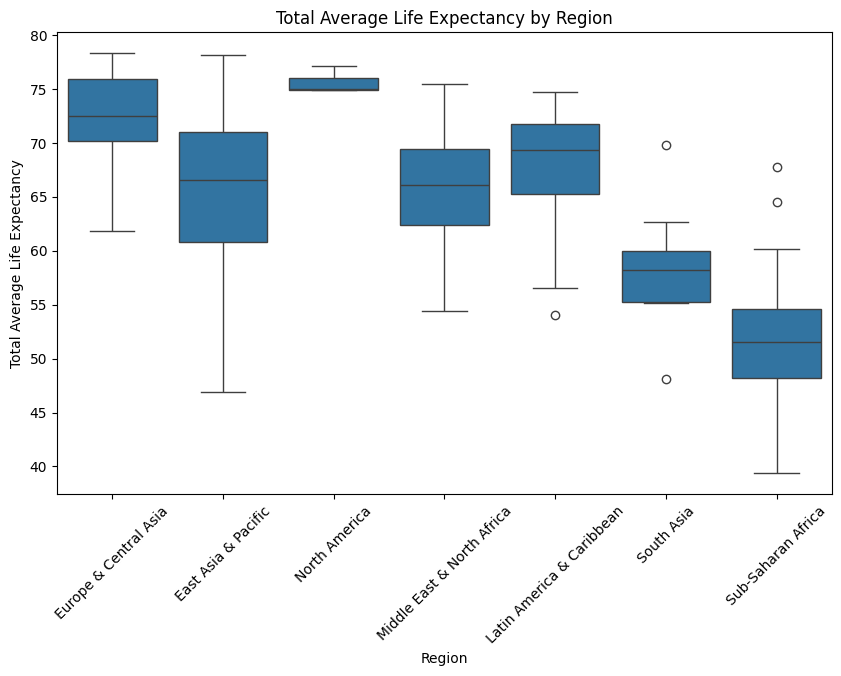

In [74]:
#Box plot untuk 'Total Average' berdasarkan 'Region'
plt.figure(figsize=(10, 6))
sns.boxplot(x='Region', y='Total Average', data=df)
plt.title('Total Average Life Expectancy by Region')
plt.xlabel('Region')
plt.ylabel('Total Average Life Expectancy')
plt.xticks(rotation=45)
plt.show()

Interpretasi Grafik
1. Rata-Rata Harapan Hidup:
- Variasi Antar Wilayah: Grafik menunjukkan adanya perbedaan yang signifikan dalam rata-rata harapan hidup antar wilayah.
- Wilayah dengan Harapan Hidup Tertinggi: Wilayah Eropa & Central Asia memiliki rata-rata harapan hidup tertinggi di antara wilayah-wilayah lainnya.
- Wilayah dengan Harapan Hidup Terendah: Wilayah Sub-Saharan Africa memiliki rata-rata harapan hidup terendah.
2. Penyebaran Data:
- Rentang: Panjang kotak menunjukkan rentang interkuartil (IQR), yaitu selisih antara kuartil ketiga dan pertama. Semakin panjang kotak, semakin besar penyebaran data di sekitar median.
- Outlier: Titik-titik di luar kumis adalah outlier. Ini mengindikasikan adanya beberapa negara di wilayah tersebut dengan rata-rata harapan hidup yang jauh di atas atau di bawah rata-rata wilayah.

Kesimpulan

Berdasarkan grafik ini, dapat disimpulkan bahwa faktor geografis memiliki pengaruh yang signifikan terhadap rata-rata harapan hidup penduduk suatu negara. Wilayah dengan pembangunan infrastruktur kesehatan yang lebih baik, akses yang lebih mudah ke layanan kesehatan, dan kondisi sosial ekonomi yang lebih stabil cenderung memiliki rata-rata harapan hidup yang lebih tinggi.

## Melakukan Prediksi Life Expectancy 2023 - 2030 Secara Global

In [37]:
from sklearn.linear_model import LinearRegression

# Pilih fitur (tahun) dan target (harapan hidup)
X = np.array(range(1960, 2023)).reshape(-1, 1)  # Gunakan data hingga 2022 untuk pelatihan
y = df.loc[:, '1960':'2022'].mean().values

# Buat model regresi linear
model = LinearRegression()

# Latih model
model.fit(X, y)

# Prediksi harapan hidup untuk tahun 2023 dan 2024
years_to_predict = np.array([2023, 2024, 2025, 2026, 2027, 2028, 2029, 2030]).reshape(-1, 1)
predictions = model.predict(years_to_predict)

# Prediksi pada data pelatihan (untuk menghitung akurasi)
y_pred = model.predict(X)

# Hitung R-squared (koefisien determinasi)
r2 = r2_score(y, y_pred)

print(f"Akurasi model (R-squared): {r2:.2f}")

# Cetak prediksi
for year, prediction in zip(years_to_predict, predictions):
    print(f"Prediksi harapan hidup untuk tahun {year[0]}: {prediction:.2f}")


Akurasi model (R-squared): 0.99
Prediksi harapan hidup untuk tahun 2023: 74.00
Prediksi harapan hidup untuk tahun 2024: 74.29
Prediksi harapan hidup untuk tahun 2025: 74.58
Prediksi harapan hidup untuk tahun 2026: 74.88
Prediksi harapan hidup untuk tahun 2027: 75.17
Prediksi harapan hidup untuk tahun 2028: 75.47
Prediksi harapan hidup untuk tahun 2029: 75.76
Prediksi harapan hidup untuk tahun 2030: 76.05


In [63]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_rf_pred = rf_model.predict(X_test)
r2_rf = r2_score(y_test, y_rf_pred)
print(f"R-squared untuk Random Forest Regressor: {r2_rf:.2f}")

# Support Vector Regressor
svr_model = SVR(kernel='linear')
svr_model.fit(X_train, y_train)
y_svr_pred = svr_model.predict(X_test)
r2_svr = r2_score(y_test, y_svr_pred)
print(f"R-squared untuk Support Vector Regressor: {r2_svr:.2f}")


R-squared untuk Random Forest Regressor: 1.00
R-squared untuk Support Vector Regressor: 0.98


In [56]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# Bagi data menjadi set pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buat dan latih model pada data pelatihan
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi pada data pelatihan dan pengujian
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Hitung R-squared untuk set pelatihan dan pengujian
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R-squared pada set pelatihan: {r2_train:.2f}")
print(f"R-squared pada set pengujian: {r2_test:.2f}")

# Periksa overfitting
if r2_train > r2_test and (r2_train - r2_test) > 0.1:
    print("Model mungkin mengalami overfitting. Perbedaan antara R-squared pelatihan dan pengujian signifikan.")
else:
    print("Model tidak menunjukkan tanda-tanda overfitting yang signifikan.")


R-squared pada set pelatihan: 0.99
R-squared pada set pengujian: 0.98
Model tidak menunjukkan tanda-tanda overfitting yang signifikan.


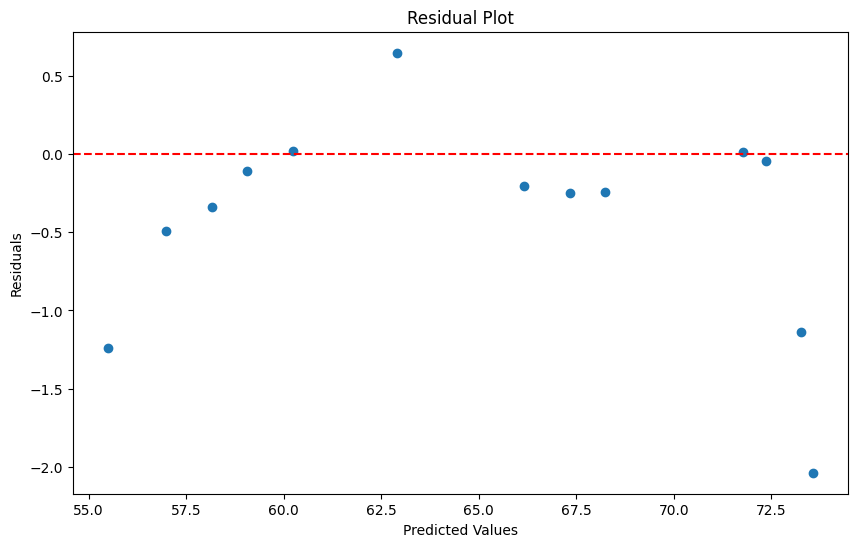

Rata-rata residu: -0.42
Deviasi standar residu: 0.66


In [65]:
# Hitung residu
residuals = y_test - y_test_pred

# Plot residu
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()

# Hitung statistik deskriptif residu
residual_mean = np.mean(residuals)
residual_std = np.std(residuals)

print(f"Rata-rata residu: {residual_mean:.2f}")
print(f"Deviasi standar residu: {residual_std:.2f}")



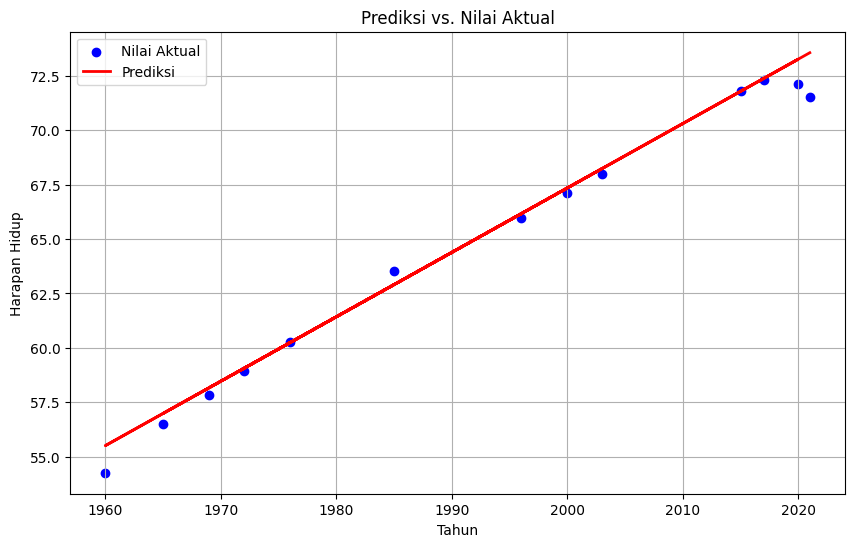

In [58]:
# Plot prediksi vs. nilai aktual
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Nilai Aktual')
plt.plot(X_test, y_test_pred, color='red', linewidth=2, label='Prediksi')
plt.title('Prediksi vs. Nilai Aktual')
plt.xlabel('Tahun')
plt.ylabel('Harapan Hidup')
plt.legend()
plt.grid(True)
plt.show()


In [35]:
# Buat DataFrame untuk menyimpan data
table_data = {'Year': range(1960, 2031), 'Average Life Expectancy': [None] * 71}
df_table = pd.DataFrame(table_data)

# Isi rata-rata harapan hidup untuk tahun 1960-2022
df_table.loc[df_table['Year'] < 2023, 'Average Life Expectancy'] = df.loc[:, '1960':'2022'].mean().values

# Isi prediksi harapan hidup untuk tahun 2023-2030
for year, prediction in zip(years_to_predict, predictions):
    df_table.loc[df_table['Year'] == year[0], 'Average Life Expectancy'] = prediction

# Tampilkan tabel
print(df_table)


    Year Average Life Expectancy
0   1960               54.260172
1   1961               54.701977
2   1962               55.193889
3   1963               55.561646
4   1964               56.187989
..   ...                     ...
66  2026               74.877832
67  2027               75.171697
68  2028               75.465563
69  2029               75.759428
70  2030               76.053294

[71 rows x 2 columns]


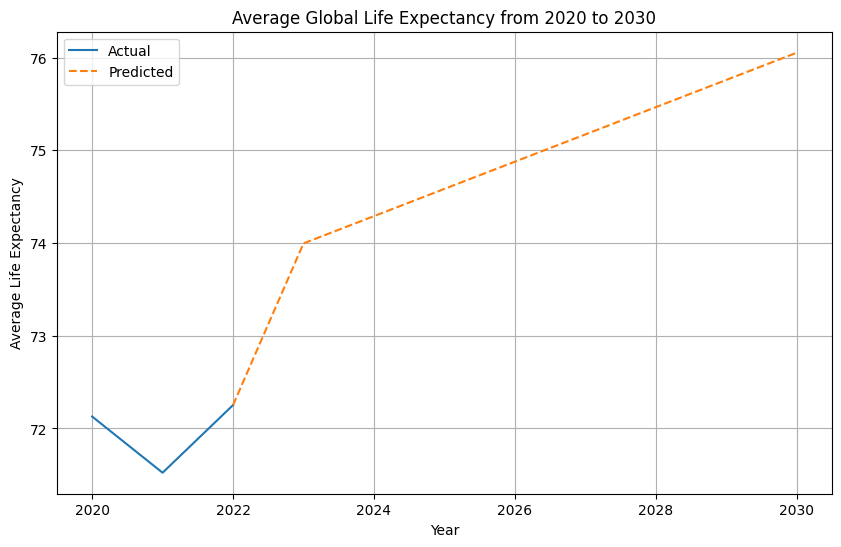

In [54]:
# Pilih tahun dari 2020 hingga 2030
years_to_plot = df_table.loc[(df_table['Year'] >= 2020) & (df_table['Year'] <= 2030), 'Year']

# Pilih rata-rata harapan hidup untuk tahun-tahun tersebut
average_life_expectancy_to_plot = df_table.loc[(df_table['Year'] >= 2020) & (df_table['Year'] <= 2030), 'Average Life Expectancy']

# Buat line chart
plt.figure(figsize=(10, 6))

# Plot data asli (2020-2022) dengan garis penuh
plt.plot(years_to_plot[:3], average_life_expectancy_to_plot[:3], label='Actual', linestyle='-')

# Plot prediksi (2023-2030) dengan garis putus-putus
plt.plot(years_to_plot[2:], average_life_expectancy_to_plot[2:], label='Predicted', linestyle='--')

plt.title('Average Global Life Expectancy from 2020 to 2030')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.legend()
plt.show()


In [81]:
# Filter data untuk wilayah East Asia & Pacific
df_east_asia = df[df['Region'] == 'East Asia & Pacific']

# Pilih fitur (tahun) dan target (harapan hidup)
X_ea = np.array(range(1960, 2023)).reshape(-1, 1)
y_ea = df_east_asia.loc[:, '1960':'2022'].mean().values

# Buat model regresi linear
model_ea = LinearRegression()

# Latih model
model_ea.fit(X_ea, y_ea)

# Prediksi harapan hidup untuk tahun 2023-2030
years_to_predict_ea = np.array(range(2023, 2031)).reshape(-1, 1)
predictions_ea = model_ea.predict(years_to_predict_ea)

# Cetak prediksi
for year, prediction in zip(years_to_predict_ea, predictions_ea):
    print(f"Prediksi harapan hidup di East Asia & Pacific untuk tahun {year[0]}: {prediction:.2f}")

# Buat DataFrame untuk menyimpan data
table_data_ea = {'Year': range(2023, 2031), 'Average Life Expectancy in East Asia & Pacific': predictions_ea.flatten()}
df_table_ea = pd.DataFrame(table_data_ea)


Prediksi harapan hidup di East Asia & Pacific untuk tahun 2023: 76.39
Prediksi harapan hidup di East Asia & Pacific untuk tahun 2024: 76.72
Prediksi harapan hidup di East Asia & Pacific untuk tahun 2025: 77.04
Prediksi harapan hidup di East Asia & Pacific untuk tahun 2026: 77.36
Prediksi harapan hidup di East Asia & Pacific untuk tahun 2027: 77.68
Prediksi harapan hidup di East Asia & Pacific untuk tahun 2028: 78.00
Prediksi harapan hidup di East Asia & Pacific untuk tahun 2029: 78.33
Prediksi harapan hidup di East Asia & Pacific untuk tahun 2030: 78.65


In [82]:
print(df_table_ea)

   Year  Average Life Expectancy in East Asia & Pacific
0  2023                                       76.392976
1  2024                                       76.715051
2  2025                                       77.037127
3  2026                                       77.359202
4  2027                                       77.681278
5  2028                                       78.003354
6  2029                                       78.325429
7  2030                                       78.647505


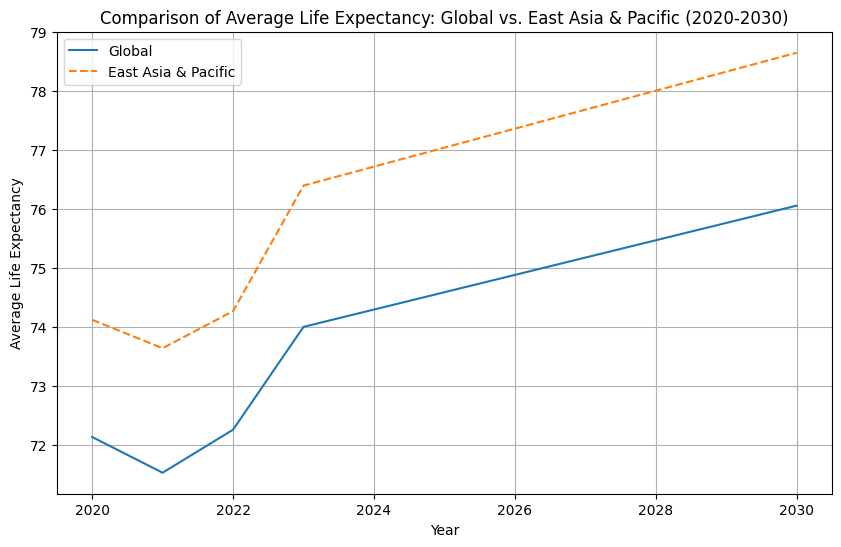

In [83]:
# Ambil data harapan hidup global dari df_table
years_global = df_table.loc[(df_table['Year'] >= 2020) & (df_table['Year'] <= 2030), 'Year']
life_expectancy_global = df_table.loc[(df_table['Year'] >= 2020) & (df_table['Year'] <= 2030), 'Average Life Expectancy']

# Ambil data harapan hidup East Asia & Pacific dari df_table_ea dan df_east_asia
years_ea = list(range(2020, 2023)) + list(df_table_ea['Year'])
life_expectancy_ea = list(df_east_asia.loc[:, '2020':'2022'].mean().values) + list(df_table_ea['Average Life Expectancy in East Asia & Pacific'])

# Buat line chart
plt.figure(figsize=(10, 6))

# Plot data harapan hidup global
plt.plot(years_global, life_expectancy_global, label='Global', linestyle='-')

# Plot data harapan hidup East Asia & Pacific
plt.plot(years_ea, life_expectancy_ea, label='East Asia & Pacific', linestyle='--')

plt.title('Comparison of Average Life Expectancy: Global vs. East Asia & Pacific (2020-2030)')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.legend()
plt.show()


In [84]:
# Filter data untuk Indonesia
df_indonesia = df[df['Country Name'] == 'Indonesia']

# Pilih fitur (tahun) dan target (harapan hidup)
X_id = np.array(range(1960, 2023)).reshape(-1, 1)
y_id = df_indonesia.loc[:, '1960':'2022'].mean().values

# Buat model regresi linear
model_id = LinearRegression()

# Latih model
model_id.fit(X_id, y_id)

# Prediksi harapan hidup untuk tahun 2023-2030
years_to_predict_id = np.array(range(2023, 2031)).reshape(-1, 1)
predictions_id = model_id.predict(years_to_predict_id)

# Cetak prediksi
for year, prediction in zip(years_to_predict_id, predictions_id):
    print(f"Prediksi harapan hidup di Indonesia untuk tahun {year[0]}: {prediction:.2f}")


Prediksi harapan hidup di Indonesia untuk tahun 2023: 73.85
Prediksi harapan hidup di Indonesia untuk tahun 2024: 74.24
Prediksi harapan hidup di Indonesia untuk tahun 2025: 74.63
Prediksi harapan hidup di Indonesia untuk tahun 2026: 75.01
Prediksi harapan hidup di Indonesia untuk tahun 2027: 75.40
Prediksi harapan hidup di Indonesia untuk tahun 2028: 75.79
Prediksi harapan hidup di Indonesia untuk tahun 2029: 76.18
Prediksi harapan hidup di Indonesia untuk tahun 2030: 76.56


In [85]:
# Buat DataFrame untuk menyimpan data
table_data_id = {'Year': range(2023, 2031), 'Average Life Expectancy in Indonesia': predictions_id.flatten()}
df_table_id = pd.DataFrame(table_data_id)

print(df_table_id)

   Year  Average Life Expectancy in Indonesia
0  2023                             73.854036
1  2024                             74.240926
2  2025                             74.627816
3  2026                             75.014706
4  2027                             75.401596
5  2028                             75.788486
6  2029                             76.175377
7  2030                             76.562267


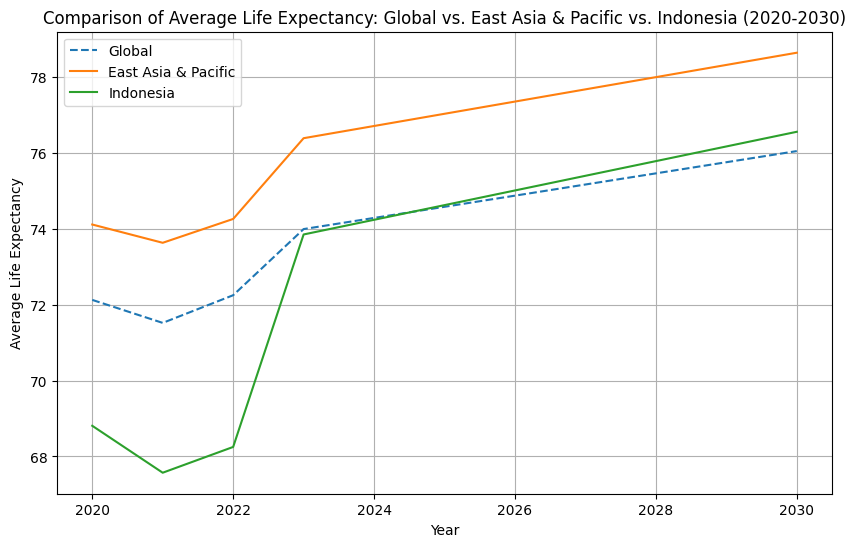

In [88]:
# Ambil data harapan hidup global dari df_table
years_global = df_table.loc[(df_table['Year'] >= 2020) & (df_table['Year'] <= 2030), 'Year']
life_expectancy_global = df_table.loc[(df_table['Year'] >= 2020) & (df_table['Year'] <= 2030), 'Average Life Expectancy']

# Ambil data harapan hidup East Asia & Pacific dari df_table_ea dan df_east_asia
years_ea = list(range(2020, 2023)) + list(df_table_ea['Year'])
life_expectancy_ea = list(df_east_asia.loc[:, '2020':'2022'].mean().values) + list(df_table_ea['Average Life Expectancy in East Asia & Pacific'])

# Ambil data harapan hidup Indonesia dari df_table_id dan df_indonesia
years_id = list(range(2020, 2023)) + list(df_table_id['Year'])
life_expectancy_id = list(df_indonesia.loc[:, '2020':'2022'].mean().values) + list(df_table_id['Average Life Expectancy in Indonesia'])

# Buat line chart
plt.figure(figsize=(10, 6))

# Plot data harapan hidup global
plt.plot(years_global, life_expectancy_global, label='Global', linestyle='--')

# Plot data harapan hidup East Asia & Pacific
plt.plot(years_ea, life_expectancy_ea, label='East Asia & Pacific', linestyle='-')

# Plot data harapan hidup Indonesia
plt.plot(years_id, life_expectancy_id, label='Indonesia', linestyle='-')

plt.title('Comparison of Average Life Expectancy: Global vs. East Asia & Pacific vs. Indonesia (2020-2030)')
plt.xlabel('Year')
plt.ylabel('Average Life Expectancy')
plt.grid(True)
plt.legend()
plt.show()
